
# Predicting the Win/Loss Outcome of League of Legends Ranked Games

#### This dataset was generated through Riot's API and downloaded from from kaggle.com
#### By Daniel Payan

In this notebook, we will develop a machine learning model to predict whether or not the **Blue Team Wins or Loses**. First we will perform a quick exploratory data analysis (EDA) on this dataset to become more familiar with our different attributes and to see if there are any outliers or null values to handle. Next we will prep our data using a train_test_split for our models. Finally, we will compare the results of **five** different models:
1. Linear Regression
2. Logistic Regression
3. Ridge Regression
4. Random Forest
5. K-Nearest Neighbors

This notebook has one CSV file, ***high_diamond_ranked_10min.csv***, which will be stored using a pandas DataFrame. For data visualization, we will be using seaborn and matplotlib. For machine learning and statistical work we will be using scikit-learn and numpy.

In [130]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [131]:
#Read data into pandas DataFrame
prediction_df = pd.read_csv('Data/high_diamond_ranked_10min.csv')

#The dataset has 9879 records with 40 attributes
prediction_df.shape

(9879, 40)

#### First let's display the overall dataset to get an overall look at our data.

In [132]:
prediction_df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


#### Now let's do some EDA to get a grasp on what these values mean

In [133]:
#Let's drop any columns with missing values
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [142]:
prediction_df['blueWins'].value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

#### Our baseline for this model is 49.9% as we have 4930 win observations out of 9879 games.

In [144]:
4930/9879

0.4990383642069035

In [135]:
#Well, luckily, we had no columns with missing values, so we can move forward.
#We also have no object/categorical attributes, so we don't need to
#make any dummy values.

#Let's create a correlation matrix to see if we can discover 
#any correlation between an attribute and the blue team winning immediately
corr_matrix = prediction_df.corr()
corr_matrix['blueWins']

gameId                          0.000985
blueWins                        1.000000
blueWardsPlaced                 0.000087
blueWardsDestroyed              0.044247
blueFirstBlood                  0.201769
blueKills                       0.337358
blueDeaths                     -0.339297
blueAssists                     0.276685
blueEliteMonsters               0.221944
blueDragons                     0.213768
blueHeralds                     0.092385
blueTowersDestroyed             0.115566
blueTotalGold                   0.417213
blueAvgLevel                    0.357820
blueTotalExperience             0.396141
blueTotalMinionsKilled          0.224909
blueTotalJungleMinionsKilled    0.131445
blueGoldDiff                    0.511119
blueExperienceDiff              0.489558
blueCSPerMin                    0.224909
blueGoldPerMin                  0.417213
redWardsPlaced                 -0.023671
redWardsDestroyed              -0.055400
redFirstBlood                  -0.201769
redKills        

#### Correlating Attributes
The **highest positive** correlating attributes to the blue team winning <br>(**factors that result in them winning**) based on this correlation matrix are the **amount of gold and experience the Blue Team has over the Red Team** (blueGoldDiff & blueExperienceDiff) and the **amount of total gold the Blue Team has** (blueTotalGold). <br>
The **highest negative** correlating attributes to the blue team winning <br>(**factors that result in them losing**) based on this correlation matrix are the inverse of the positive attributes with the **amount of gold and experience the Red Team has over the Blue Team** (redGoldDiff & redExperienceDiff) and the **amount of total gold the Red Team has** (redTotalGold) being the strongest correlations. 

#### Let's plot these correlations
Violin plots will allow us to see the distribution of values, while also visualizing the correlations we just discovered. <br>
We can see clearly that the distribution of values when the Blue Team wins (blueWins = 1) is on average higher for blueGoldDiff and lower for redGoldDiff.

<Axes: xlabel='blueWins', ylabel='blueGoldDiff'>

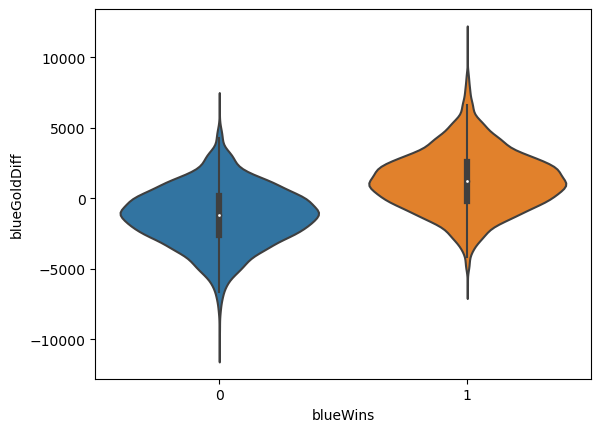

In [108]:
sb.violinplot(data=prediction_df,x='blueWins',y='blueGoldDiff')

<Axes: xlabel='blueWins', ylabel='redGoldDiff'>

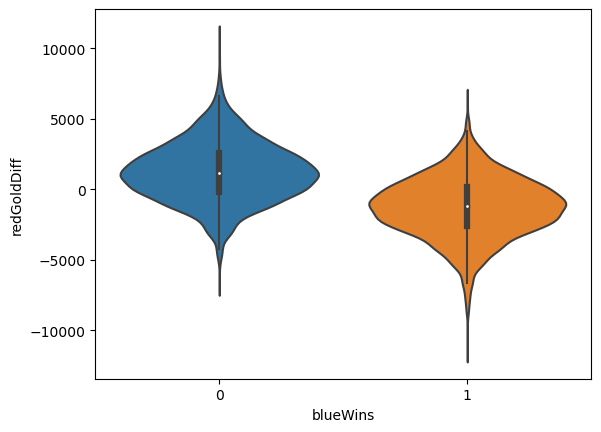

In [109]:
#Let's plot Heralds vs. Towers first
sb.violinplot(data=prediction_df,x='blueWins',y='redGoldDiff')

#### Time to Begin Data Preparation

In [110]:
#Our outcome variable is going to be whether or not blue wins
y = prediction_df['blueWins']
prediction_df.drop('blueWins',axis=1,inplace=True)
x = prediction_df.values

In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

x = scaler.fit_transform(prediction_df)

In [112]:
#Now we will use train_test_split to split the dataset as train:test=(80%:20%)
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2, random_state=13)
#The dimensions of the new datasets are below
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((7903, 39), (1976, 39), (7903,), (1976,))

#### Linear Regression

In [113]:
from sklearn import linear_model

linreg = linear_model.LinearRegression()
linreg.fit(xtrain,ytrain)

print('This is the Train Score: ',  linreg.score(xtrain,ytrain))
print('This is the Test Score: ', linreg.score(xtest,ytest))

This is the Train Score:  0.2851192440095657
This is the Test Score:  0.26391048521042293


In [114]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly_features = poly.fit_transform(xtrain,ytrain)
poly_reg_model = linear_model.LinearRegression()
poly_reg_model.fit(poly_features,ytrain)

poly_reg_model.score(poly_features,ytrain)

0.31583634518865245

#### Linear Regression is outputting poor scores.
Though, this is expected as it is assuming the relationship between the dependent variables and independent variable is strictly linear. Let's move forward and see if we can find a model that better suits our problem!

#### Logistic Regression

In [115]:
#Scaling the model around a center of 0 to ensure the variance of the
#features are in the same range
from sklearn.preprocessing import scale
x = scale(x)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2, random_state=13)

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtrain)
print('This is the Train Accuracy Score: ', accuracy_score(ytrain,ypred))
print('This is the Test Accuracy Score: ', accuracy_score(ytest,logreg.predict(xtest)))

This is the Train Accuracy Score:  0.7368088067822346
This is the Test Accuracy Score:  0.72165991902834


#### Logistic Regression is outputting much better scores than Linear Regression
Logistic Regression is performing much better as it is well-suited for this task. Logistic Regression models the probability of a binary outcome which is perfect for our Win Loss outcome dataset. However, logistic regression still assumes the relationship between the variables and outcome variable is linear, so let's continue moving through models to see if we can improve this score further!

#### Ridge Regression

In [117]:
#Since our data is already scaled and has a numerical outcome, we can move 
#straight to our modeling
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(xtrain,ytrain)
yprob = ridge.predict(xtrain)
ypred = np.asarray([np.argmax(line) for line in yprob])
yptest = ridge.predict(xtest)
predtest = np.asarray([np.argmax(line) for line in yptest])
print('This is the Train Accuracy Score: ', accuracy_score(ytrain,ypred))
print('This is the Test Accuracy Score: ', accuracy_score(ytest,predtest))

This is the Train Accuracy Score:  0.5001898013412628
This is the Test Accuracy Score:  0.5040485829959515


#### Ridge Regression did better than Linear, but fell short compared to Logistic
Ridge Regression did not perform better than Logistic Regression, though this is expected due to our Linear Regression results. Ridge Regression is best utilized when a Linear Regression model is overly complex and overfits a dataset, which did not occur in our notebook. The penalty term, L2, that is added in Ridge Regression seemed to improve the overall performance compared to that of the base Linear Regression, but it seems Ridge is not the model for this job either. On to the next!

#### Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier as RFC

rfc = RFC()
rfc.fit(xtrain,ytrain)
ypred = rfc.predict(xtrain)
print('This is the Train Accuracy Score: ', accuracy_score(ytrain,ypred))
print('This is the Test Accuracy Score: ', accuracy_score(ytest,rfc.predict(xtest)))

This is the Train Accuracy Score:  1.0
This is the Test Accuracy Score:  0.7191295546558705


#### Random Forest performed nearly as well as Logistic Regression
Random Forest is the first of our models to take a non-linear approach when analyzing the relationship between our input and output variables. Random Forest does a good job here, though was not able to work at its fullest potential due to our data not being very noisy or complex, which is where Random Forest really shines. Let's try our final model and see if that one can take it home!

#### K-Nearest Neighbors

In [121]:
#Similar to our last couple of models, our data is prepped and ready to go,
#so we just need to import the actual model and get to work!
from sklearn.neighbors import KNeighborsClassifier
k=2
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtrain)

print('This is the Train Accuracy Score: ', accuracy_score(ytrain,ypred))
print('This is the Test Accuracy Score: ', accuracy_score(ytest,knn.predict(xtest)))

This is the Train Accuracy Score:  0.8162723016575983
This is the Test Accuracy Score:  0.6503036437246964


#### K-Nearest Neighbors performed right in the middle of our models. 
The K-Nearest Neighbors model created two clusters based on our input variables in which one was labeled Winners, and the other, Losers. However, it's test accuracy score was not able to surpass that of logistic regression, so now we will take our highest scoring model and try to tweak it to improve its score.

#### Logistic Regression (Round 2)

In [128]:
# Model training and evaluation
logreg = LogisticRegression(penalty='l2', C=0.1, solver='lbfgs', max_iter=1000, random_state=13)
logreg.fit(xtrain, ytrain)

ypred_train = logreg.predict(xtrain)
ypred_test = logreg.predict(xtest)

train_accuracy = accuracy_score(ytrain, ypred_train)
test_accuracy = accuracy_score(ytest, ypred_test)

print('This is the Train Accuracy Score: ', train_accuracy)
print('This is the Test Accuracy Score: ', test_accuracy)

This is the Train Accuracy Score:  0.7366822725547261
This is the Test Accuracy Score:  0.7226720647773279


#### It seems the highest test accuracy score we could reach with our models was 0.7226. 
Though, when reflecting on the original question, this reflects that the model can **predict the winner of a ranked game of League of Legends within the first 10 minutes of play around 70% of the time.** As our **baseline accuracy was 49.9%**, we can definitely see this as an improvement, and by increasing the number of attributes, number of games, or the duration of games recorded, we could potentially increase the performance of this model even further. 